In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


In [ ]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression = 'gzip')

DF.shape

(24916, 2701)

> ## 2) DataFrame Information

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [ ]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


> ## 3) 'X', 'y' 분리

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

In [ ]:
print(y.value_counts())
print(len(y.value_counts()))

투싼            1931
i30           1296
싼타페           1282
그랜저HG240       940
KONA 1         840
그랜저            770
소나타 YF         762
소나타 뉴라이즈       725
G90            714
소나타 하이브리드      664
아슬란            659
소나타 LF         653
더뉴아반떼AD        653
제네시스G380       652
소나타 LPI        646
엑센트            641
아반떼 XD         639
제네시스 G80       638
아반떼MD          636
소나타            635
아이오닉 하이브리드     633
팰리세이드          628
투싼1            628
그랜저 IG         627
아반떼AD          627
아이오닉 일렉트릭      620
벨로스터           620
에쿠스            619
스타렉스           614
맥스크루즈          605
소나타 NF         605
G80스포츠         605
제네시스 G70       600
더뉴그랜드스타렉스      509
Name: 2700, dtype: int64
34


In [ ]:
X = X.values
y = y.values
print(X[:5], y[:5])

[[230 236 252 ... 55 54 52]
 [235 238 243 ... 124 123 118]
 [94 112 134 ... 80 91 95]
 [80 88 90 ... 104 114 124]
 [215 229 194 ... 81 96 101]] ['G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠']


In [ ]:
X_array= X.astype(float)/255

In [ ]:
X_array[:1]

array([[0.90196078, 0.9254902 , 0.98823529, ..., 0.21568627, 0.21176471,
        0.20392157]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_LE = encoder.fit_transform(y)
y_LE

array([ 0,  0,  0, ..., 33, 33, 33])

In [ ]:
from keras.utils import to_categorical

y_LE = to_categorical(y_LE)
print(y_LE[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_LE, test_size=0.2, random_state=2045)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19932, 2700) (4984, 2700) (19932, 34) (4984, 34)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(15945, 2700) (3987, 2700) (15945, 34) (3987, 34)


In [ ]:
print(X_train.shape, y_train.shape)
print( X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(15945, 2700) (15945, 34)
(3987, 2700) (3987, 34)
(4984, 2700) (4984, 34)


# 모델링

## 1)

In [ ]:
from keras import models, layers

RNN = models.Sequential()
RNN.add(layers.Dense(512, activation = 'relu', input_shape=(2700,)))
RNN.add(layers.Dense(256, activation='relu'))
RNN.add(layers.Dense(128, activation='relu'))
RNN.add(layers.Dense(34, activation='softmax'))

RNN.summary()

RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1382912   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 34)                4386      
Total params: 1,551,522
Trainable params: 1,551,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Hist_RNN = RNN.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
125/125 [==============================] - 4s 8ms/step - loss: 3.3860 - accuracy: 0.0760 - val_loss: 3.1001 - val_accuracy: 0.1094
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 3.0394 - accuracy: 0.1144 - val_loss: 3.0178 - val_accuracy: 0.1221
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 2.9380 - accuracy: 0.1305 - val_loss: 2.8953 - val_accuracy: 0.1460
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 2.8225 - accuracy: 0.1518 - val_loss: 2.8468 - val_accuracy: 0.1545
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 2.7220 - accuracy: 0.1862 - val_loss: 2.7306 - val_accuracy: 0.1756
Epoch 6/100
125/125 [==============================] - 1s 4ms/step - loss: 2.6108 - accuracy: 0.2108 - val_loss: 2.6407 - val_accuracy: 0.2069
Epoch 7/100
125/125 [==============================] - 1s 4ms/step - loss: 2.5150 - accuracy: 0.2294 - val_loss: 2.5718 - val_accuracy: 0.2112

In [ ]:
loss, accuracy = RNN.evaluate(X_test, y_test)

loss, accuracy

156/156 [==============================] - 0s 2ms/step - loss: 2.9928 - accuracy: 0.1100


(2.992810010910034, 0.10995184630155563)

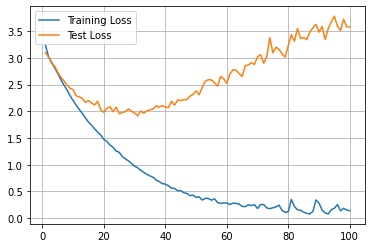

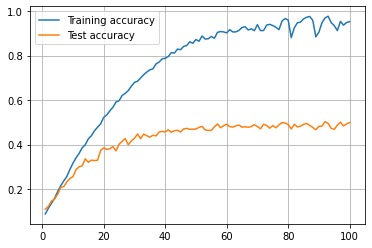

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN.history['loss'])+1)


plt.plot(epochs, Hist_RNN.history['loss'])
plt.plot(epochs, Hist_RNN.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN.history['accuracy'])
plt.plot(epochs, Hist_RNN.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## 2)

In [ ]:
from keras import models, layers, regularizers

RNN1 = models.Sequential()
RNN1.add(layers.Dense(512, activation = 'relu', input_shape=(2700,),
                            kernel_regularizer=regularizers.l2(0.00001)))
RNN1.add(layers.Dropout(0.4))
RNN1.add(layers.Dense(256, activation='relu',
        kernel_regularizer=regularizers.l2(0.00001)))
RNN1.add(layers.Dropout(0.4))
RNN1.add(layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.00001)))
RNN1.add(layers.Dropout(0.4))
RNN1.add(layers.Dense(34, activation='softmax'))

RNN1.summary()

RNN1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_RNN2 = RNN1.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               1382912   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 34)               

In [ ]:
loss2, accuracy2 = RNN1.evaluate(X_test, y_test)

loss2, accuracy2

156/156 [==============================] - 0s 2ms/step - loss: 3.0081 - accuracy: 0.1124


(3.008068799972534, 0.11235955357551575)

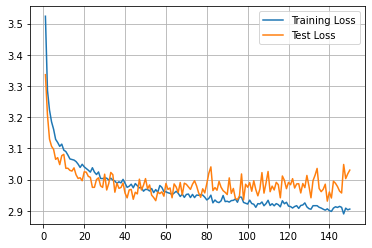

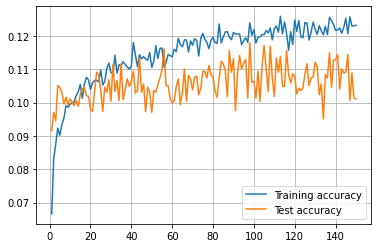

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN2.history['loss'])+1)


plt.plot(epochs, Hist_RNN2.history['loss'])
plt.plot(epochs, Hist_RNN2.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN2.history['accuracy'])
plt.plot(epochs, Hist_RNN2.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## 3) 지나친 규제

In [ ]:
from keras import models, layers, regularizers

RNN3 = models.Sequential()
RNN3.add(layers.Dense(512, input_shape=(2700,), kernel_regularizer=regularizers.l2(0.00001)))
RNN3.add(layers.BatchNormalization())
RNN3.add(layers.Activation('relu'))
RNN3.add(layers.Dropout(0.4))
RNN3.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.00001)))
RNN3.add(layers.Activation('relu'))
RNN3.add(layers.Dropout(0.4))
# RNN1.add(layers.Dense(128, activation='relu',
#         kernel_regularizer=regularizers.l2(0.00001)))
RNN3.add(layers.Dropout(0.4))
RNN3.add(layers.Dense(34, activation='softmax'))

RNN3.summary()

RNN3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_RNN3 = RNN3.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_valid, y_valid))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               1382912   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
loss3, accuracy3 = RNN3.evaluate(X_test, y_test)

loss3, accuracy3

156/156 [==============================] - 0s 2ms/step - loss: 2.9984 - accuracy: 0.3551


(2.9983692169189453, 0.3551364243030548)

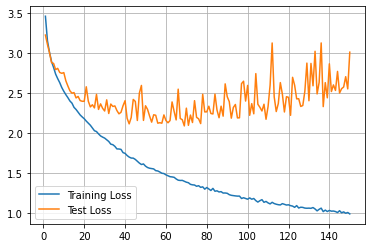

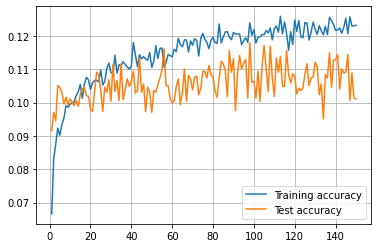

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN3.history['loss'])+1)


plt.plot(epochs, Hist_RNN3.history['loss'])
plt.plot(epochs, Hist_RNN3.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN2.history['accuracy'])
plt.plot(epochs, Hist_RNN2.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## 4)


In [ ]:
from keras import models, layers, regularizers

RNN4 = models.Sequential()
RNN4.add(layers.Dense(512, activation = 'relu', input_shape=(2700,),
                            kernel_regularizer=regularizers.l2(0.00001)))
RNN4.add(layers.Dropout(0.4))
# RNN1.add(layers.Dense(256, activation='relu',
#         kernel_regularizer=regularizers.l2(0.00001)))
# RNN1.add(layers.Dropout(0.4))
RNN4.add(layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.00001)))
RNN4.add(layers.Dropout(0.4))
RNN4.add(layers.Dense(34, activation='softmax'))

RNN4.summary()

RNN4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_RNN4 = RNN4.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_valid, y_valid))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               1382912   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 34)                4386      
Total params: 1,452,962
Trainable params: 1,452,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
125/125 [==============================] - 1s 6ms/step - loss: 3.8946 - accuracy: 0.0432 - val_los

In [ ]:
loss4, accuracy4 = RNN4.evaluate(X_test, y_test)

loss4, accuracy4

156/156 [==============================] - 0s 2ms/step - loss: 2.6751 - accuracy: 0.2097


(2.675053596496582, 0.20967094600200653)

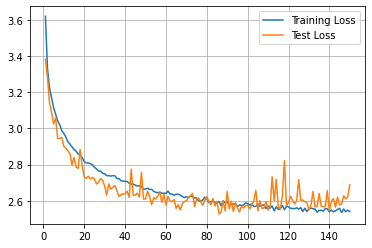

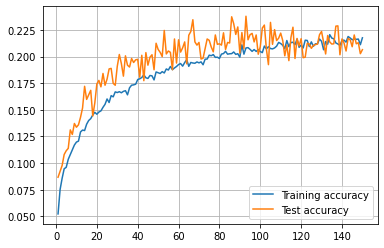

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN4.history['loss'])+1)


plt.plot(epochs, Hist_RNN4.history['loss'])
plt.plot(epochs, Hist_RNN4.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN4.history['accuracy'])
plt.plot(epochs, Hist_RNN4.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## 5)

In [ ]:
from keras import models, layers, regularizers

RNN5 = models.Sequential()
RNN5.add(layers.Dense(512, activation = 'tanh', input_shape=(2700,),
                            kernel_regularizer=regularizers.l2(0.00001)))
RNN5.add(layers.Dropout(0.4))
# RNN1.add(layers.Dense(256, activation='relu',
#         kernel_regularizer=regularizers.l2(0.00001)))
# RNN1.add(layers.Dropout(0.4))
RNN5.add(layers.Dense(128, activation='tanh',
        kernel_regularizer=regularizers.l2(0.00001)))
RNN5.add(layers.Dropout(0.4))
RNN5.add(layers.Dense(34, activation='softmax'))

RNN5.summary()

RNN5.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_RNN5 = RNN5.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_valid, y_valid))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1382912   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 34)                4386      
Total params: 1,452,962
Trainable params: 1,452,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
125/125 [==============================] - 1s 6ms/step - loss: 3.9494 - accuracy: 0.0471 - val_los

In [ ]:
acloss5, accuracy5 = RNN5.evaluate(X_test, y_test)

acloss5, accuracy5

156/156 [==============================] - 0s 2ms/step - loss: 2.3982 - accuracy: 0.2781


(2.398169755935669, 0.27808988094329834)

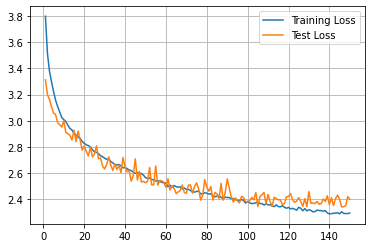

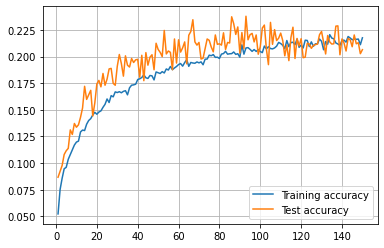

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN5.history['loss'])+1)


plt.plot(epochs, Hist_RNN5.history['loss'])
plt.plot(epochs, Hist_RNN5.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN4.history['accuracy'])
plt.plot(epochs, Hist_RNN4.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## CNN

In [ ]:
X_train = X_train.reshape((15945, 30,30,3))
X_valid =X_valid.reshape((3987, 30,30,3))
X_test= X_test.reshape((4984, 30,30,3))
X_train.shape, X_valid.shape, X_test.shape

((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')

X_valid_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=128)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=128)

In [ ]:
from keras import layers, models

CNN3 = models.Sequential()
CNN3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3),
                      kernel_regularizer=regularizers.l2(0.00001)))
CNN3.add(layers.Dropout(0.4))
CNN3.add(layers.MaxPool2D((2,2)))
CNN3.add(layers.Conv2D(64, (3,3), activation='relu'))

CNN3.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN3.add(layers.MaxPool2D((2,2)))
CNN3.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN3.add(layers.Flatten())
CNN3.add(layers.Dense(units=512, activation='relu'))
CNN3.add(layers.Dropout(0.5))
CNN3.add(layers.Dense(units=34, activation='softmax'))

CNN3.summary()

CNN3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)       

In [ ]:
%%time
Hist_CNN3 = CNN3.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/100
124/124 [==============================] - 38s 67ms/step - loss: 3.4770 - accuracy: 0.0750 - val_loss: 3.1837 - val_accuracy: 0.1001
Epoch 2/100
124/124 [==============================] - 8s 64ms/step - loss: 3.1865 - accuracy: 0.0895 - val_loss: 3.0022 - val_accuracy: 0.1164
Epoch 3/100
124/124 [==============================] - 8s 64ms/step - loss: 2.9932 - accuracy: 0.1026 - val_loss: 2.9335 - val_accuracy: 0.1156
Epoch 4/100
124/124 [==============================] - 8s 64ms/step - loss: 2.8860 - accuracy: 0.1263 - val_loss: 2.8009 - val_accuracy: 0.1422
Epoch 5/100
124/124 [==============================] - 8s 64ms/step - loss: 2.8093 - accuracy: 0.1361 - val_loss: 2.7747 - val_accuracy: 0.1317
Epoch 6/100
124/124 [==============================] - 8s 64ms/step - loss: 2.7367 - accuracy: 0.1528 - val_loss: 2.8812 - val_accuracy: 0.1349
Epoch 7/100
124/124 [==============================] - 8s 64ms/step - loss: 2.6572 - accuracy: 0.1725 - val_loss: 2.5956 - val_accuracy

In [ ]:
acloss3, accuracy3 = CNN3.evaluate(X_test, y_test)

acloss3, accuracy3

156/156 [==============================] - 1s 4ms/step - loss: 1.6106 - accuracy: 0.4936


(1.610606074333191, 0.4935794472694397)

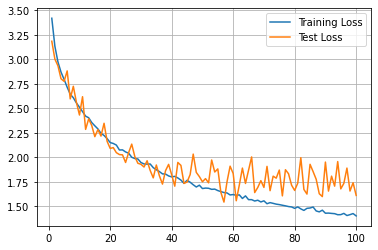

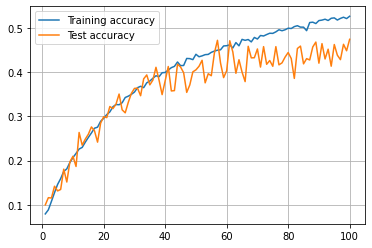

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN3.history['loss'])+1)


plt.plot(epochs, Hist_CNN3.history['loss'])
plt.plot(epochs, Hist_CNN3.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN3.history['accuracy'])
plt.plot(epochs, Hist_CNN3.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()